In [1]:
%cd /home/q123/Desktop/explo

import torch 
import gpytorch 
import logging
import logging.config

from src.helpers import setup_experiment
from src.optimizers.gibo import GIBOptimizer
from src.optimizers.vanilla import BOptimizer
from src.config import get_configs

logging.config.fileConfig('logging.conf')
# create root logger
logger = logging.getLogger()

/home/q123/Desktop/explo


/home/q123/miniconda3/envs/explo/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from src.tester import Tester 

#env_name = "Swimmer-v2"
env_name = "CartPole-v1"
kernel_name = "rbf"
kernel_name2 = "linearstate"
delta = 1e-2
n_train =20
n_test = 30
n_episodes = 1 ### number of times to run parameters in test / for train it's one

In [3]:
env_config,likelihood_config,kernel_config,_,_ = get_configs(env_name,kernel_name)
additional_layers=[4]
model,objective_env = setup_experiment(env_config,kernel_config,likelihood_config,additional_layers)
tester = Tester(model,objective_env,
                 local_opt ="/home/q123/Desktop/explo/local_optima/CartPole-v1_[4, 4, 1]",
                 use_opt_states = True,
                 delta =delta,
                 n_train=n_train,n_test=n_test,n_episodes=n_episodes)

#### generate data for all experiments
train_data,test_data,opt_states = tester.generate_data()

MathLog.src.helpers : WARNING : MLP dimensions : [4, 4, 1]
Using ard_num_dims = 25
local_y 0.9999942183494568 local_opt tensor([-0.1238,  0.0230, -0.1873, -0.4381, -0.0541,  0.0396,  0.1156,  0.2574,
        -0.0377, -0.0358])
 intial local opt reward : 0.9999942183494568
Generating data
Done generating data


##############################
covar_lengthscale max 0.5 / min 0.5                      covar_outputscale 1.9999998807907104                     noise 0.30000001192092896
##############################
last parameters tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.])
##############################
covar_lengthscale max 0.42734453082084656 / min 0.42734453082084656                      covar_outputscale 1.467376947402954                     noise 0.20000004768371582
##############################
last parameters tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.])
matplotlib.legend : WARNING : No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
matplotlib.legend : WARNING : No artists with labels found to put in legend.  Note that artists whose label star

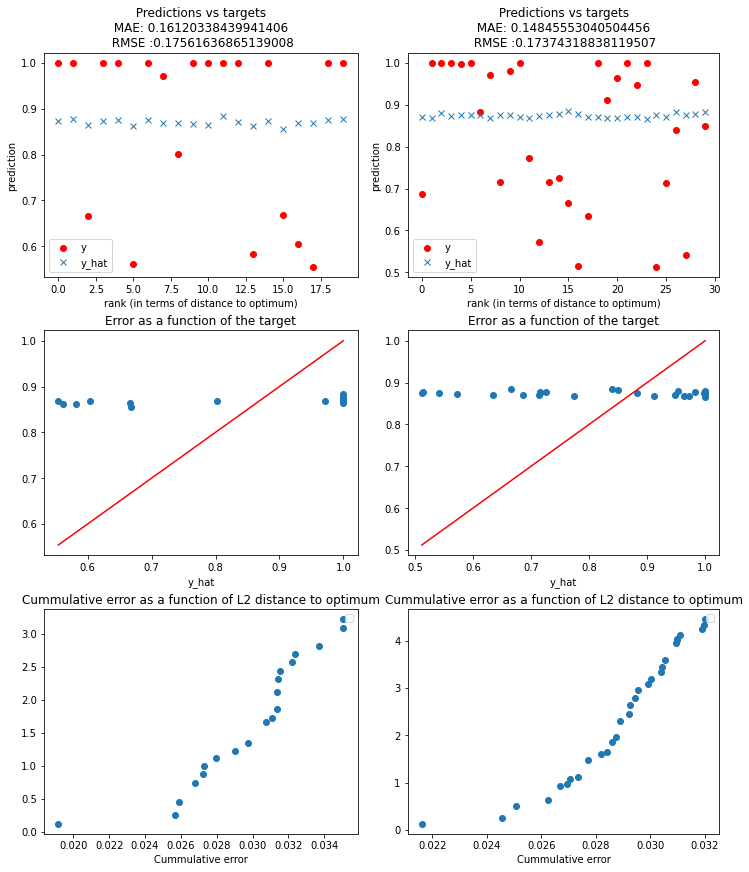

In [4]:
train_data,train_pred,test_data,test_pred,opt_data = tester.run(train_data,test_data,opt_states)

MathLog.src.helpers : WARNING : MLP dimensions : [4, 4, 1]
Using ard_num_dims = 25
Statekernel i have mlp MLP()
local_y 0.9999942183494568 local_opt tensor([-0.1238,  0.0230, -0.1873, -0.4381, -0.0541,  0.0396,  0.1156,  0.2574,
        -0.0377, -0.0358])
 intial local opt reward : 0.9999942183494568
##############################
linear model covar_lengthscale max 0.0019960079807788134 / min 0.0019960079807788134
variance  tensor([[0.6931]], grad_fn=<SoftplusBackward>)
noise 0.30000001192092896
##############################
last parameters tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.])
##############################
linear model covar_lengthscale max 0.0019960079807788134 / min 0.0019960079807788134
variance  tensor([[2.1133e-06]], grad_fn=<SoftplusBackward>)
noise 0.20000000298023224
##############################
last parameters tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

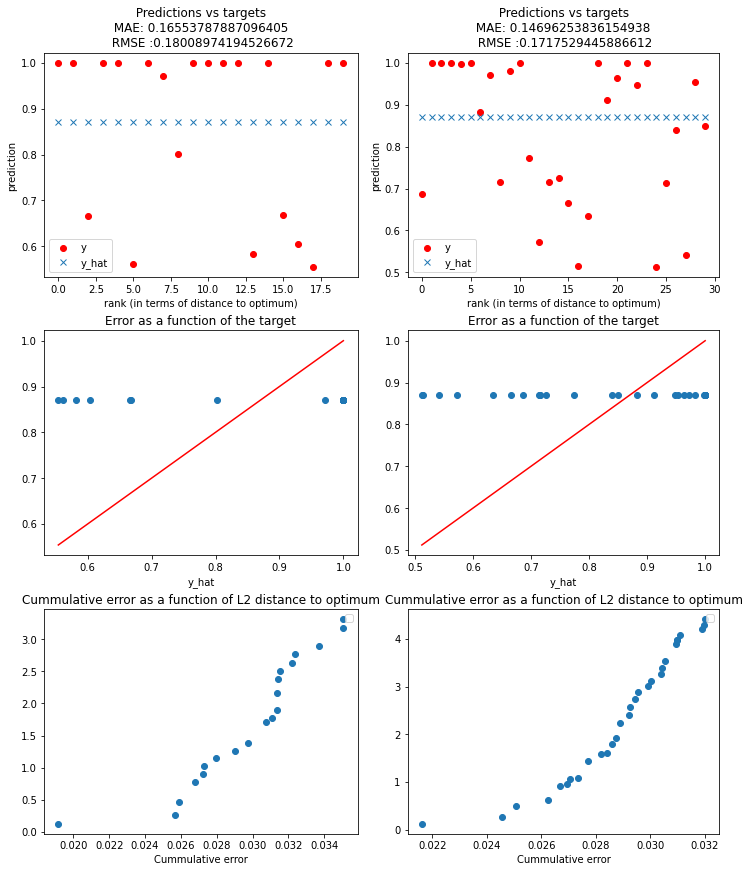

In [5]:
env_config,likelihood_config,kernel_config,_,_ = get_configs(env_name,kernel_name2)
additional_layers=[4]
model,objective_env = setup_experiment(env_config,kernel_config,likelihood_config,additional_layers)
tester = Tester(model,objective_env,
                 local_opt ="/home/q123/Desktop/explo/local_optima/CartPole-v1_[4, 4, 1]",
                 use_opt_states = True,
                 delta =delta,
                 n_train=n_train,n_test=n_test,n_episodes=n_episodes)

train_data,train_pred,test_data,test_pred,opt_data = tester.run(train_data,test_data,opt_states)

In [6]:
from sklearn.linear_model import ARDRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


train_x,train_y,train_s = train_data
test_x,test_y,test_s = test_data
local_opt,opt_states = opt_data

Phi_train = tester.model.mlp(train_x,opt_states).flatten(start_dim=1)
Phi_test = tester.model.mlp(test_x,opt_states).flatten(start_dim=1)
Y_train,Y_test = train_y,test_y

ard = make_pipeline(StandardScaler(),
                    ARDRegression(compute_score=True, n_iter=20))

ard.fit(Phi_train, Y_train)

Y_train_pred = ard.predict(Phi_train)
Y_test_pred = ard.predict(Phi_test)


matplotlib.legend : WARNING : No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


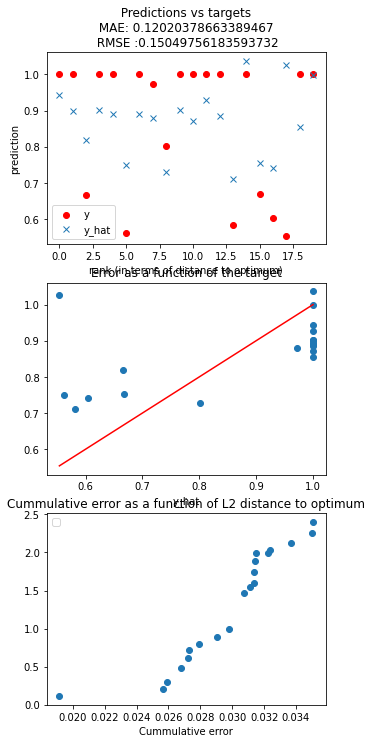

In [7]:
tester.plot(train_x,Y_train,Y_train_pred,local_opt.squeeze(),"train")

matplotlib.legend : WARNING : No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


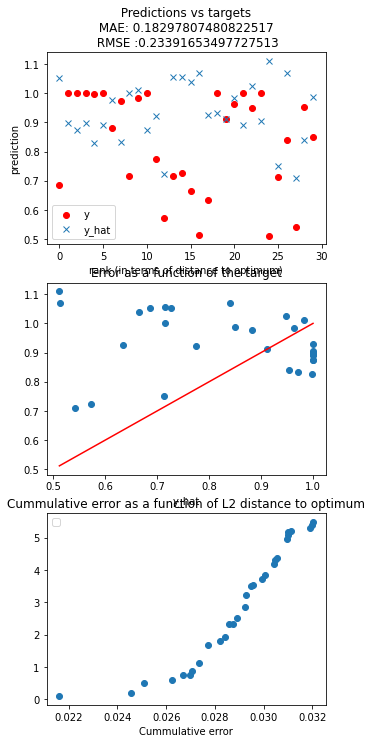

In [8]:
tester.plot(test_x,Y_test,Y_test_pred,local_opt.squeeze(),"test")

In [10]:
# Importing modules that are required
 
from sklearn.datasets import load_boston
from sklearn.linear_model import LassoLars
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import numpy as np

## Setup problem
sigma2  = (0.05)**2
Phi = Phi_train.numpy()
Phi_t = Phi_test.numpy()
Y = Y_train.numpy()
Y_t = Y_test.numpy()
## Scale data
# Phi_scaler = StandardScaler(with_mean=False)
# Y_scaler = StandardScaler()
# Phi = Phi_scaler.fit_transform(Phi)
# Y = Y_scaler.fit_transform(Y.reshape(-1,1))

## Define L1 solver 
n_points = Phi.shape[0]
n_feats = Phi.shape[1]
gamma_k = np.ones(n_feats) ## initial point for solver
alpha = 1/ (2*n_points) ## sklearn weights the l2 norm
regressor = LassoLars(alpha=alpha,fit_intercept=False,normalize=False)

def get_sigma_y(gamma,Phi):
    
    n_points = Phi.shape[0]
    
    Gamma = np.diag(gamma)
    
    sigma_y = sigma2  * np.eye(n_points) + Phi @ Gamma @ Phi.T
    
    return sigma_y

def predict(gamma,Phi_train,y_train,
            Phi_test):
            
        
    Sigma_y = get_sigma_y(gamma,Phi_train)
    Post_m = np.diag(gamma) @ Phi_train.T @ np.linalg.inv(Sigma_y) @ y_train
    y_pred = Phi_test @ Post_m
    
    return y_pred


cnt = 0

for i in range(1000):
    
    
    ### Intermediate variables for the lasso
    Sigma_y = get_sigma_y(gamma_k,Phi)
    Sigma_y_inv = np.linalg.inv(Sigma_y)
    c_k = np.diag(Phi.T @ Sigma_y_inv @ Phi )
    mu_k = 2* sigma2 * (c_k ** 0.5)
    
    ### Define and solve the lasso problem.
    
    Phi_tmp = Phi @ np.diag(mu_k**-1)
    Y_tmp = Y.copy()    
    regressor.fit(Phi_tmp, Y_tmp)
    
    ### Get current estimate of gamma
    zeta_k =  regressor.coef_
    xi_k = np.diag(mu_k**-1) @ zeta_k
    gamma_old = gamma_k.copy()
    gamma_k = (c_k ** -0.5)* np.abs(xi_k)
    
    assert np.all(gamma_k>=0)
  
    if np.linalg.norm(gamma_k-gamma_old, np.inf) <= 1e-5:
        cnt +=1 
        if cnt > 5 :
            print(f'breaking after {i} iterations')
            break
    
    else : 
        cnt =0

Y_train_pred = predict(gamma_k,Phi,Y,Phi_test=Phi)
print("TRAIN MAE",np.mean(np.abs(Y_train_pred-Y)))

Y_test_pred = predict(gamma_k,Phi,Y,Phi_test=Phi_t)
print("TEST MAE",np.mean(np.abs(Y_test_pred-Y_t)))

breaking after 33 iterations
TRAIN MAE 0.12071660877044396
TEST MAE 0.18302007737115877


TypeError: argsort(): argument 'input' (position 1) must be Tensor, not numpy.ndarray

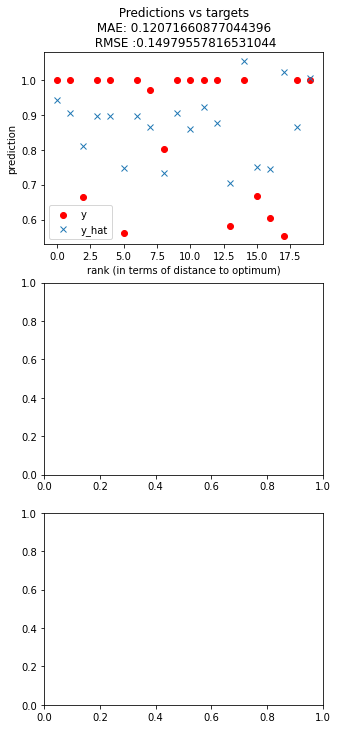

In [11]:
tester.plot(train_x,Y,Y_train_pred,local_opt.squeeze(),"train")

torch.Size([100, 25]) torch.Size([25])


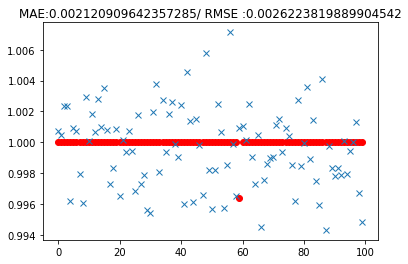

In [ ]:
plot(test_x,local_opt.squeeze(),Y_t,Y_test_pred)